Creating the backprop

https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ann_class/backprop.py

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def forward(X, W1, b1, W2, b2):
    
    #Sigmoid
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    
    #Softmax
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()


def derivative_w2(Z, T, Y): #hiddens, targets, and output
    N, K = T.shape #N = 1500, K = 3
    M = Z.shape[1] #number of hidden units

    #slow
    #ret1 = np.zeros((M,K))
    #for n in xrange(N):
    #    for m in xrange(M):
    #        for k in xrange(K):
    #            ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m] #This is from the basic formula you copied down
                
    #try a faster way. reduce the Ms
    #ret2 = np.zeros((M,K))
    #for n in xrange(N):
    #    for k in xrange(K):
    #        ret2[:,k] += (T[n,k] - Y[n,k])*Z[n,:]
    #assert(np.abs(ret1 - ret2).sum() < 10e-10)  
    
    #Can we get rid of the Ks?
    
    # ret3 = np.zeros((M, K))
    # for n in xrange(N): # slow way first
    #     ret3 += np.outer( Z[n], T[n] - Y[n] )

    # assert(np.abs(ret1 - ret3).sum() < 0.00001)
    
    #Lets not loop over anything. Much much faster
    ret4 = Z.T.dot(T - Y) #Z.T = MxN; T-Y = NxK. Result will be MxK
    
    return ret4            

def derivative_b2(T, Y): #I don't think I have this written down
    return (T - Y).sum(axis = 0)
    
    
def derivative_w1(X, Z, T, Y, W2):    
    N, D = X.shape
    M, K = W2.shape

    # slow way first
    #ret1 = np.zeros((X.shape[1], M))
    #for n in xrange(N):
    #    for k in xrange(K):
    #        for m in xrange(M):
    #            for d in xrange(D):
    #                ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]
    
    
    # fastest. Much much faster
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)
    
    return ret2

def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0) #W2 Transposed. This is the fast way

In [22]:
def main():
     # create the data
    Nclass = 500
    D = 2 # dimensionality of input (# of features)
    M = 3 # hidden layer size
    K = 3 # number of classes (outputs)
    
    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2, 2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
    X = np.vstack([X1, X2, X3]) 
    
    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass) # A 1500X1 array - the classification(targets)
    N = len(Y) # 1500
    
    # turn Y into an indicator matrix for training
    T = np.zeros((N,K)) #Indicator variable
    
    # The for loop uses Y, a 1500X1 array and creates "T" a one-hot encoded 1500X3 matrix for the targets
    for i in xrange(N):
        T[i, Y[i]] = 1
        
    #Visualize Data
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()
    
    #Randomly initialize weights
    W1 = np.random.rand(D,M)
    b1 = np.random.rand(M)
    W2 = np.random.rand(M,K)
    b2 = np.random.rand(K) 
    
    #Now for back prop
    
    learning_rate = 10e-7
    costs = [] #Keep an array of the cost function so we can see the progression afterwards
    
    for epoch in xrange(100000): #how many times we are going to cycle
        output, hidden = forward(X, W1, b1, W2, b2) #hidden = Z. Required to calculate the gradient
        if epoch % 100 == 0: #every 100 epochs we are going to calculate the cost 
            c = cost(T, output) #(not yet written)
            P = np.argmax(output, axis = 1)
            r = classification_rate(Y, P)
            print "cost:", c, "classification_rate:", r
            costs.append(c)
        
        #This is Gradient Ascent not Descent. Same concept just the signs are reversed
        W2 += learning_rate * derivative_w2(hidden, T, output) #With respect to w2
        b2 += learning_rate * derivative_b2(T, output)
        W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
        b1 += learning_rate * derivative_b1(T, output, W2, hidden)
    
    
    #Vizualize the cost function
    plt.plot(costs)
    plt.show()

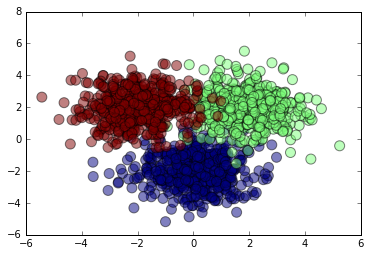

cost: -1786.53041079 classification_rate: 0.333333333333
cost: -1728.8871983 classification_rate: 0.333333333333
cost: -1680.36473002 classification_rate: 0.333333333333
cost: -1639.50711617 classification_rate: 0.334
cost: -1605.03393241 classification_rate: 0.363333333333
cost: -1575.83264143 classification_rate: 0.403333333333
cost: -1550.94772534 classification_rate: 0.446666666667
cost: -1529.56796259 classification_rate: 0.484666666667
cost: -1511.01250644 classification_rate: 0.516
cost: -1494.71627201 classification_rate: 0.533333333333
cost: -1480.21517525 classification_rate: 0.547333333333
cost: -1467.13177416 classification_rate: 0.557333333333
cost: -1455.1617887 classification_rate: 0.572
cost: -1444.06184343 classification_rate: 0.579333333333
cost: -1433.63862824 classification_rate: 0.587333333333
cost: -1423.73953854 classification_rate: 0.596666666667
cost: -1414.2447539 classification_rate: 0.602666666667
cost: -1405.06064638 classification_rate: 0.612
cost: -1396.1

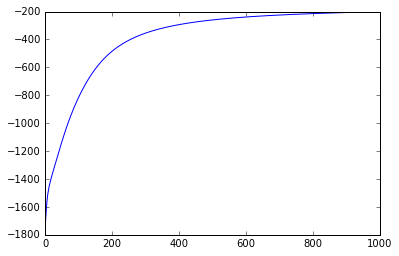

In [28]:
# __main__ — Top-level script environment

# This module represents the (otherwise anonymous) scope in which the interpreter’s main program executes — commands read 
# either from standard input, from a script file, or from an interactive prompt. It is this environment in which the idiomatic 
# “conditional script” stanza causes a script to run:

if __name__ == '__main__':
    main()

In [40]:
Nclass = 500
D = 2 # dimensionality of input (# of features)
M = 3 # hidden layer size
K = 3 # number of classes (outputs)

W1 = np.random.rand(D,M)
b1 = np.random.rand(M)
W2 = np.random.rand(M,K)
b2 = np.random.rand(K) 
    
X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]) # a 1500x2 matrix
    
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass) # A 1500X1 array
N = len(Y) # 1500
T = np.zeros((N,K))

In [6]:
T.shape

(1500L, 3L)

In [7]:
for i in xrange(N):
        T[i, Y[i]] = 1


In [8]:
T

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [9]:
T.shape

(1500L, 3L)

In [11]:
Z

NameError: name 'Z' is not defined

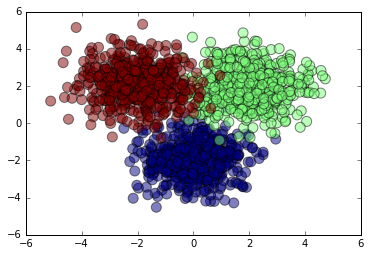

cost: -1672.80450459 classification_rate: 0.247333333333
cost: -1655.71388798 classification_rate: 0.228
cost: -1639.81008803 classification_rate: 0.334
cost: -1624.81765057 classification_rate: 0.498
cost: -1610.5236577 classification_rate: 0.458
cost: -1596.76291782 classification_rate: 0.396666666667
cost: -1583.40682876 classification_rate: 0.372666666667
cost: -1570.35499028 classification_rate: 0.360666666667


KeyboardInterrupt: 

In [29]:
GG = np.array([[1,2,3],[4,5,6]])

In [30]:
GG

array([[1, 2, 3],
       [4, 5, 6]])

In [34]:
HH = np.array([[4,5], [6,7], [8,9]])

In [35]:
HH

array([[4, 5],
       [6, 7],
       [8, 9]])

In [36]:
answer = np.dot(GG,HH)
answer

array([[ 40,  46],
       [ 94, 109]])

In [37]:
#also 
answerr = GG.dot(HH)
answerr

array([[ 40,  46],
       [ 94, 109]])

In [38]:
X.shape

(1500L, 2L)

In [41]:
W1.shape

(2L, 3L)

In [42]:
b1.shape

(3L,)

In [43]:
print b1

[ 0.73077624  0.17994943  0.95968986]
